#### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [3]:
data = pd.read_csv(r'Main Dataset.csv',skiprows=4)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


##### Data Cleaning

In [4]:
print(data.isnull().sum())

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2021                1
2022                1
2023                1
2024              266
Unnamed: 69       266
Length: 70, dtype: int64


📊 Summary of Data:  

Country Name, Country Code, Indicator Name, Indicator Code: ✅ No missing values.

Years 1960 to 2023: Some missing values.

2024 and Unnamed: 69: Mostly missing (266 rows = probably all countries).

In [5]:
# Drop missing values
data = data.drop(columns=['Unnamed: 69'])

In [6]:
data['2024']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
261   NaN
262   NaN
263   NaN
264   NaN
265   NaN
Name: 2024, Length: 266, dtype: float64

In [7]:
data = data.drop(columns=['2024'])

In [8]:
# interpolate missing values across years 
# This will fill gaps using linear interpolation based on neighboring years (e.g., missing 1985 will be averaged between 1984 and 1986).

year_cols = [str(year) for year in range(1960, 2023)]
data[year_cols] = data[year_cols].interpolate( axis=1)


In [9]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0


In [10]:
# check remaining missing values
print(data[year_cols].isnull().sum())

1960    2
1961    2
1962    2
1963    2
1964    2
       ..
2018    1
2019    1
2020    1
2021    1
2022    1
Length: 63, dtype: int64


In [ ]:
# Fill any remaining start/end gaps using forward/backward fill
data[year_cols] = data.fillna(data[year_cols].ffill(axis=1).bfill(axis=1))

In [ ]:
# verify no missing values
print(data[year_cols].isnull().sum().sum())

63


In [ ]:
# Find which rows (countries) have missing values

# Filter rows that still contain any NaNs in year columns
missing_rows = data[data[year_cols].isnull().any(axis=1)]
missing_rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# See which countries are affected
print(missing_rows[['Country Name', 'Country Code']])

       Country Name Country Code
110  Not classified          INX


In [ ]:
data = data.drop(missing_rows.index)
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1812788.0,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,30226309.0,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,55594838.0,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,15895315.0,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0


In [ ]:
# verify no missing values
print(data[year_cols].isnull().sum().sum())

0


##### Data Visualization

Categorical Columns: 'Data Source', 'World Development Indicators'

Continuous Column:

📈 Time Series Visualizations

1. Line Plot  
Plot GDP, population, or literacy rate of a country over time.

In [ ]:
#Reshape from wide to long format
df_long = data.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)
df_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130072080.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0


In [ ]:
# Convert Year to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long.dropna(subset=['Value'], inplace=True)

In [ ]:
# Choose an indicator and countries
indicator = 'SP.POP.TOTL'  # change this to any available indicator
countries = ['Aruba', 'Afghanistan', 'Angola']

df_filtered = df_long[
    (df_long['Indicator Name'] == indicator) &
    (df_long['Country Name'].isin(countries))
]
df_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value


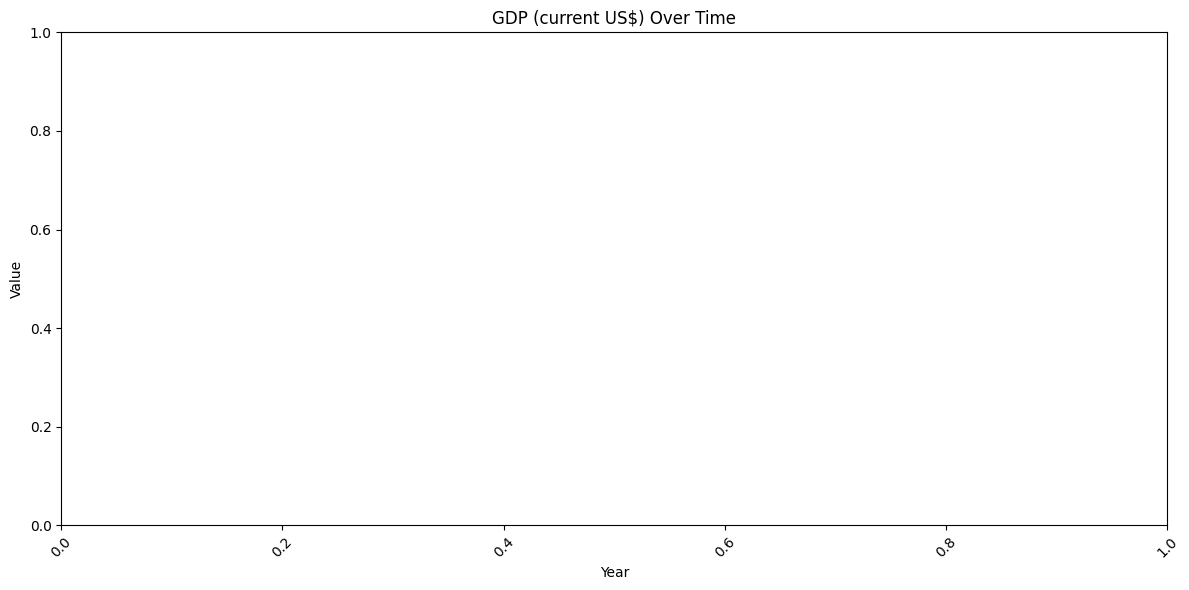

In [ ]:
# Line Plot - GDP trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Year', y='Value', hue='Country Name')
plt.title(f'{indicator} Over Time')
plt.ylabel('Value')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Multi-Country Line Plot
Compare trends for multiple countries on the same plot.

🌍 Country-Level Comparisons 

1. Bar Chart (Static Year)  
Compare countries for a single year (e.g., GDP in 2020).  
Sort by value for clarity.